In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from tqdm import tqdm
from breed_map import BREED_MAP

In [31]:
class DogDetector:
    def __init__(self): # define ResNet50 model
        self._ResNet50_model = ResNet50(weights='imagenet')
    
    def _path_to_tensor(self, img_path):
        # loads RGB image as PIL.Image.Image type
        img = image.load_img(img_path, target_size=(224, 224))
        # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
        x = image.img_to_array(img)
        # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
        return np.expand_dims(x, axis=0)

    def _paths_to_tensor(self, img_paths):
        list_of_tensors = [self._path_to_tensor(img_path) for img_path in tqdm(img_paths)]
        return np.vstack(list_of_tensors)

    def _ResNet50_predict_labels(self, img_path):
        # returns prediction vector for image located at img_path
        processed_img = preprocess_input(self._path_to_tensor(img_path))
        return np.argmax(self._ResNet50_model.predict(processed_img))

    def detect_breed(self, img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        prediction = self._ResNet50_predict_labels(img_path)
        if (prediction <= 268) & (prediction >= 151):
            print(BREED_MAP[prediction])
        else:
            print("No dog found")

    ### returns "True" if a dog is detected in the image stored at img_path
    def has_dog(self, img_path):
        prediction = self._ResNet50_predict_labels(img_path)
        print(prediction)
        return ((prediction <= 268) & (prediction >= 151)) 


No dog found


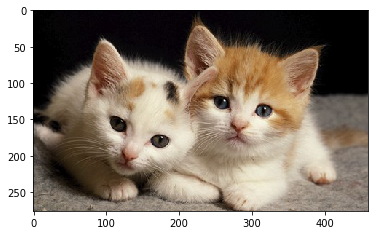

In [32]:
dog_detector = DogDetector()
dog_detector.detect_breed("cat_photos/cat2.jpg")